In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Loading the data
To get started let's first load in the data! We will make use of the helper functions provided in `data_utils.py`

# NOTE: You need to add the data200cvproject folder to your drive if it is not added already

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/data200cvproject"

 cv_eda_starter.ipynb	  home
 cv_model_starter.ipynb  'Milestone 2: EDA + Internal Peer Review (10%) - October 28, 2024.gdoc'
 data_utils.py		 'Milestone 3: Mandatory Check-In (7.gdoc'
 feature_utils.py	  __pycache__


In [ ]:
import os
os.chdir("/content/drive/My Drive/data200cvproject")

In [ ]:
from data_utils import get_images, get_labels

The following is the list of disasters in our dataset.

In [ ]:
disaster_list = ["hurricane-matthew", "socal-fire", "midwest-flooding"]

We will load each disaster train dataset into a dictionary. Recall that each disaster consists of images and labels (0 - 3) of the damage level.

In [ ]:




data = {}
split = "train"
# with open('/content/EDA/config.json') as config_file:
#     config = json.load(config_file)
#     data_dir = "/content/EDA/config.json"

# Manually set the data directory, i don't think we need the config file for anything else?
data_dir = "./home/jovyan/shared/course/data100-shared-readwrite/fa24_grad_project_data/satellite-image-data"

for disaster in disaster_list:
    print(f"Loading {split} images and labels for {disaster} dataset...")
    images = get_images(data_dir, disaster, split=split)
    labels = get_labels(data_dir, disaster, split=split)
    data[disaster] = {"images": images, "labels": labels}

Loading train images and labels for hurricane-matthew dataset...
Loading train images and labels for socal-fire dataset...
Loading train images and labels for midwest-flooding dataset...


In [ ]:

# Initialize an empty list to store rows
data_rows = []

# Loop through the disasters in the `data` dictionary
for disaster, content in data.items():
    images = content["images"]
    labels = content["labels"]

    # Each image and label becomes a row in the DataFrame
    for image, label in zip(images, labels):
        # Append a dictionary for each image-label pair
        data_rows.append({
            "disaster": disaster,
            "image": image,     # You can store the image array or a path to the image file
            "label": label      # Label associated with the image
        })

# Create the DataFrame from the list of dictionaries
df = pd.DataFrame(data_rows)

# Display the DataFrame
df.head()


,disaster,image,label
0,hurricane-matthew,"[[[58, 94, 83], [60, 97, 86], [61, 98, 86], [6...",3
1,hurricane-matthew,"[[[150, 177, 183], [147, 174, 182], [153, 180,...",0
2,hurricane-matthew,"[[[59, 81, 75], [53, 75, 69], [47, 68, 62], [5...",1
3,hurricane-matthew,"[[[194, 209, 205], [137, 161, 157], [99, 127, ...",0
4,hurricane-matthew,"[[[127, 156, 147], [134, 165, 159], [129, 162,...",2


Let's visualize an image and its label in the dataset.

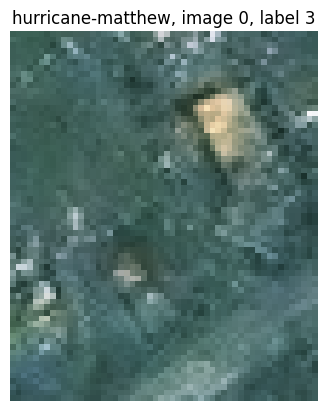

image shape: (65, 54, 3)


In [ ]:
disaster = disaster_list[0]
images = data[disaster]["images"]
labels = data[disaster]["labels"]

# index of the image to display
idx = 0
img = images[idx]
label = labels[idx]

plt.title(f"{disaster}, image {idx}, label {label}")
plt.imshow(img.astype(np.uint8))
plt.axis("off")
plt.show()

#
print(f"image shape: {img.shape}")

# Extracting Color Information
Each image is an RGB image represented as a numpy array of dimensions (width, height, 3). The last dimension corresponds to the RGB *color channels* in the image. We can split the image by color channels and visualize each of them individually.

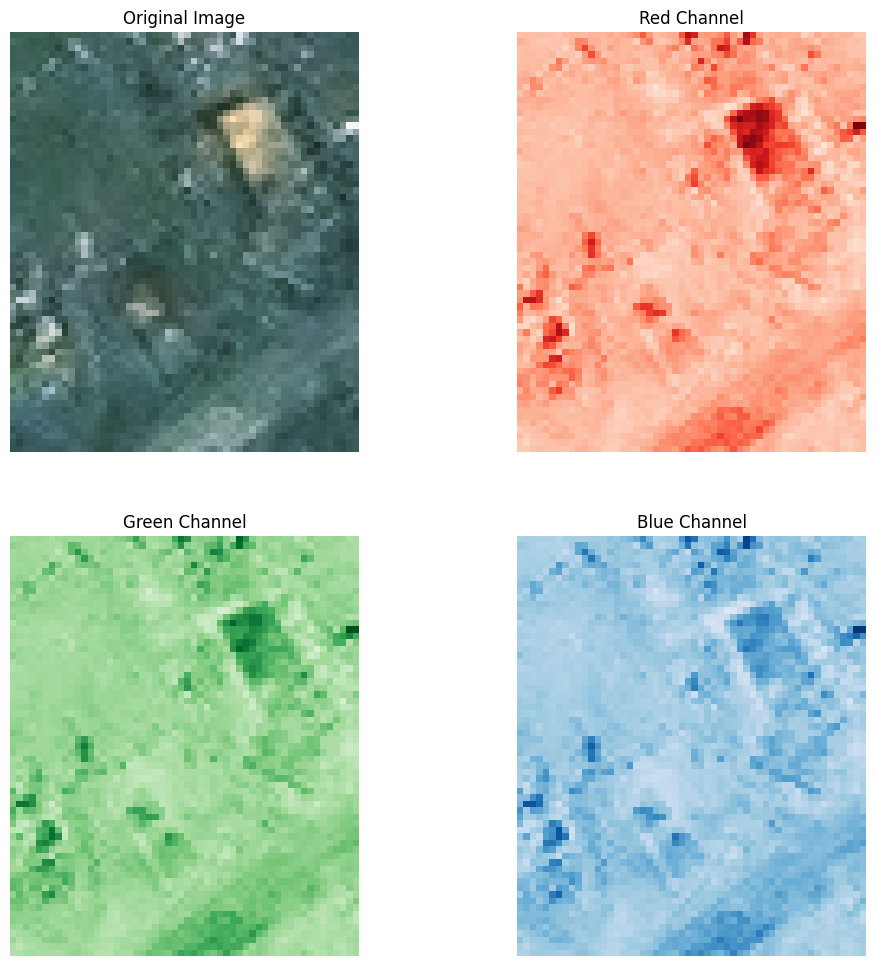

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img[:, :, 0], cmap="Reds", vmin=0, vmax=255)
plt.title("Red Channel")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(img[:, :, 1], cmap="Greens", vmin=0, vmax=255)
plt.title("Green Channel")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(img[:, :, 2], cmap="Blues", vmin=0, vmax=255)
plt.title("Blue Channel")
plt.axis("off")

plt.show()

We can zoom in on just a pixel as well.

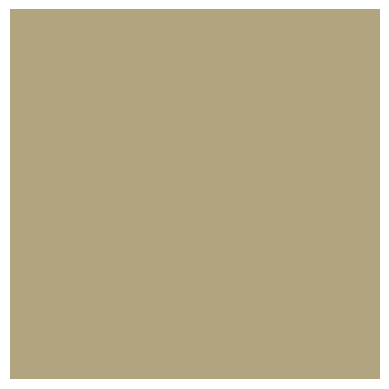

Pixel value: [177 165 128], coordinate: (15, 35)


In [ ]:
coord = (15, 35)
pixel_value = img[coord[0], coord[1], :]
pixel_image = np.array([[pixel_value]])

plt.imshow(pixel_image)
plt.axis("off")
plt.show()

print(f"Pixel value: {pixel_value}, coordinate: {coord}")

# Extracting Edge and Texture Information

So far we have considered the **color** information in an image. However, other important aspects of an image are the edges and texture.

Let us consider some popular feature processing methods for extracting edge and texture information. We will use the utilities provided in `feature_utils.py`.

In [ ]:
from feature_utils import get_sobel_features, get_gabor_features, generate_gabor_kernel, get_local_binary_pattern

Let's try the Sobel Edge Filter.

Read more about Sobel edge detection: https://en.wikipedia.org/wiki/Sobel_operator and https://scikit-image.org/docs/stable/auto_examples/edges/plot_edge_filter.html

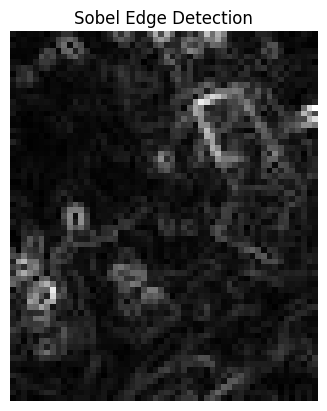

In [ ]:
edges = get_sobel_features(img)
plt.imshow(edges, cmap="gray")
plt.title("Sobel Edge Detection")
plt.axis("off")
plt.show()

Now let's look at local binary patterns.

Read more about LBP: https://en.wikipedia.org/wiki/Local_binary_patterns and https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_local_binary_pattern.html

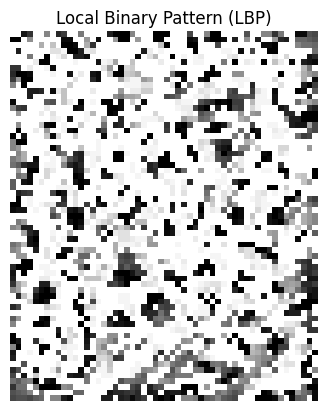

In [ ]:
lbp = get_local_binary_pattern(img, radius=3)
plt.imshow(lbp, cmap="gray")
plt.axis("off")
plt.title("Local Binary Pattern (LBP)")
plt.show()

Another popular filter for image processing is the Gabor filter. The Gabor filters are a family of filters parametrized by orientation, frequency, bandwith, etc. Let's generate one such filter.

Read more about Gabor filters: https://en.wikipedia.org/wiki/Gabor_filter and https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_gabor.html

In [ ]:
theta = 0
sigma = 1.0
frequency = 0.1

kernel = generate_gabor_kernel(theta, sigma, frequency)
gabor = get_gabor_features(img, kernel)

Let's visualize this filter (aka kernel) and the response of the image when we apply the filter. Concretely we are taking the convolution of the image with the filter. See https://en.wikipedia.org/wiki/Kernel_(image_processing) for more details.

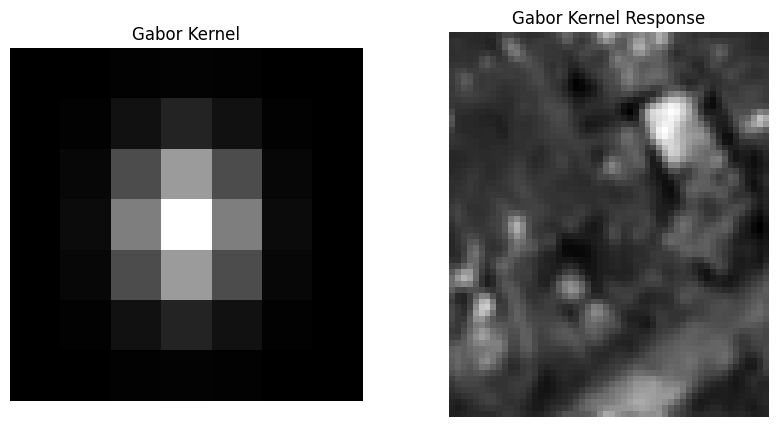

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plot Gabor Kernel
axs[0].imshow(kernel, cmap="gray")
axs[0].axis("off")  # Remove axis
axs[0].set_title("Gabor Kernel")

# Plot Gabor Kernel Response
axs[1].imshow(gabor, cmap="gray")
axs[1].axis("off")  # Remove axis
axs[1].set_title("Gabor Kernel Response")

plt.show()

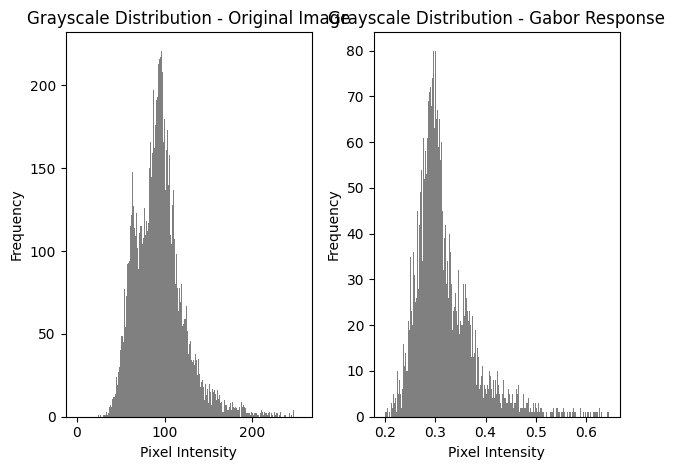

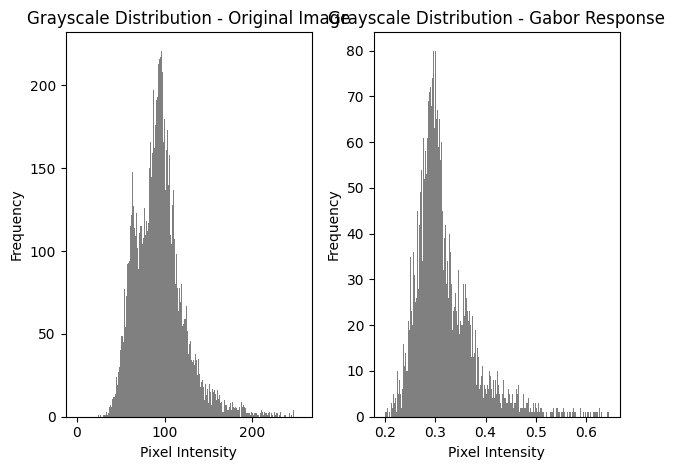

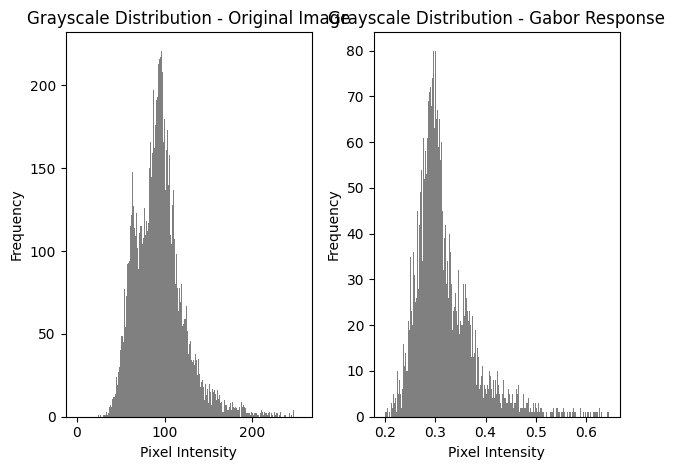

In [ ]:
for disaster in disaster_list:
    # Retrieve images for the current disaster
    images = data[disaster]["images"]


    # Histogram for the original image
    plt.subplot(1, 2, 1)
    plt.hist(img.ravel(), bins=256, range=(0, 255), color='gray')
    plt.title("Grayscale Distribution - Original Image")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    # Histogram for the Gabor response
    plt.subplot(1, 2, 2)
    plt.hist(gabor.ravel(), bins=256, range=(gabor.min(), gabor.max()), color='gray')
    plt.title("Grayscale Distribution - Gabor Response")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()


# Exploratory Data Analysis

The agency would like you to start performing some exploratory data analysis to build an initial understanding of the data. As part of the exploratory data analysis, the agency is interested in understanding certain aspects of the dataset better.

Feel free to add more cells as you see fit for your analysis.

# EDA - Basic Statistics

## Number of Images per Disaster Type


In [ ]:
#jesse

In [ ]:
import numpy as np
import os

disaster_types = ['hurricane-matthew', 'midwest-flooding', 'socal-fire']

# Iterate over disaster types for train datasets
for disaster in disaster_types:
    train_images_path = os.path.join(data_dir, disaster, 'train_images.npz')

    train_data = np.load(train_images_path)
    num_train_images = len(train_data.files)
    print(f'{disaster} (train): {num_train_images} images')

# load the test data
test_images_fire_flood_path = os.path.join(data_dir, 'test_images_flooding-fire.npz')
test_images_hurricane_path = os.path.join(data_dir, 'test_images_hurricane-matthew.npz')

# Load and print the test datasets' image counts
test_data_flood_fire = np.load(test_images_fire_flood_path)
num_test_images_fire_flood = len(test_data_flood_fire.files)
print(f'Flooding and Fire (test): {num_test_images_fire_flood} images')

test_data_hurricane = np.load(test_images_hurricane_path)
num_test_images_hurricane = len(test_data_hurricane.files)
print(f'hurricane-matthew (test): {num_test_images_hurricane} images')


hurricane-matthew (train): 11151 images
midwest-flooding (train): 7004 images
socal-fire (train): 8380 images
Flooding and Fire (test): 3847 images
hurricane-matthew (test): 2788 images


## Distribution of Image Sizes in Each Dataset

In [ ]:
#jeremy

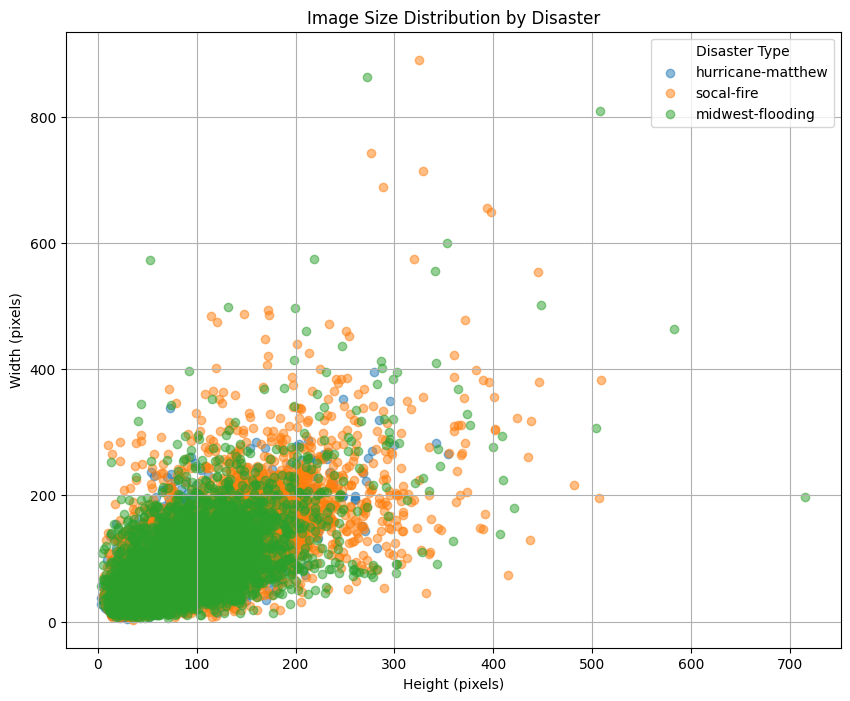

In [ ]:
import matplotlib.pyplot as plt

# Initialize a dictionary to store the sizes for each disaster
image_size_distribution = {}

# Iterate over each disaster to compute the image sizes
for disaster in disaster_list:
    # Retrieve images for the current disaster
    images = data[disaster]["images"]

    # Calculate the sizes of each image (height, width)
    sizes = [image.shape[:2] for image in images]  # shape[:2] gets (height, width)

    # Store the sizes in the dictionary
    image_size_distribution[disaster] = sizes

# Plot the distribution of image sizes for each disaster
plt.figure(figsize=(10, 8))

for disaster, sizes in image_size_distribution.items():
    # Extract heights and widths separately for each disaster
    heights = [size[0] for size in sizes]
    widths = [size[1] for size in sizes]

    # Create a scatter plot for the sizes
    plt.scatter(heights, widths, label=disaster, alpha=0.5)

# Add plot details
plt.title('Image Size Distribution by Disaster')
plt.xlabel('Height (pixels)')
plt.ylabel('Width (pixels)')
plt.legend(title='Disaster Type')
plt.grid(True)
plt.show()



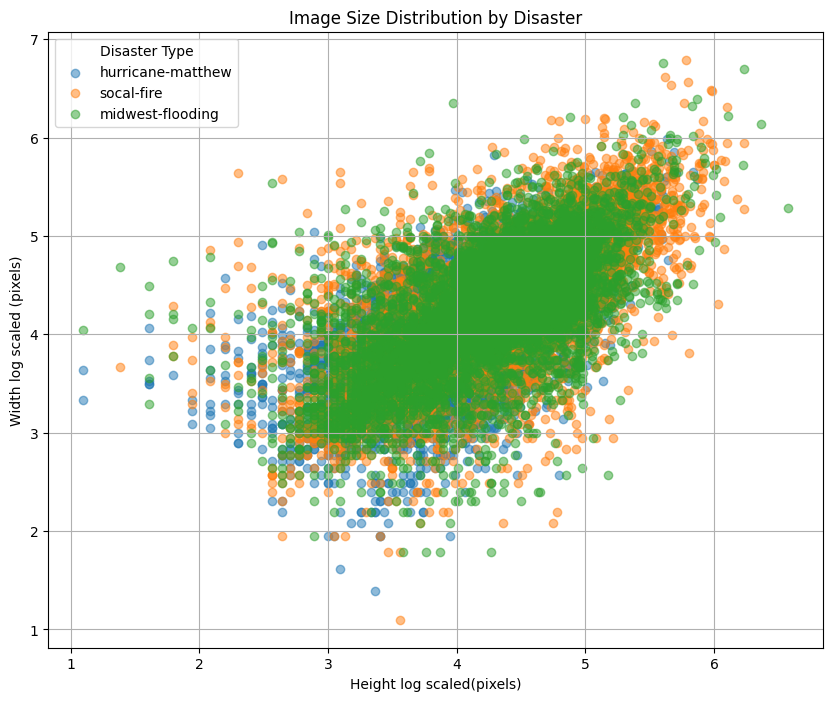

In [ ]:
import matplotlib.pyplot as plt

# Initialize a dictionary to store the sizes for each disaster
image_size_distribution = {}

# Iterate over each disaster to compute the image sizes
for disaster in disaster_list:
    # Retrieve images for the current disaster
    images = data[disaster]["images"]

    # Calculate the sizes of each image (height, width)
    sizes = [image.shape[:2] for image in images]  # shape[:2] gets (height, width)

    # Store the sizes in the dictionary
    image_size_distribution[disaster] = sizes

# Plot the distribution of image sizes for each disaster
plt.figure(figsize=(10, 8))

for disaster, sizes in image_size_distribution.items():
    # Extract heights and widths separately for each disaster
    heights = [size[0] for size in sizes]
    widths = [size[1] for size in sizes]

    # Create a scatter plot for the sizes
    plt.scatter(np.log(heights), np.log(widths), label=disaster, alpha=0.5)

# Add plot details
plt.title('Image Size Distribution by Disaster')
plt.xlabel('Height log scaled(pixels)')
plt.ylabel('Width log scaled (pixels)')
plt.legend(title='Disaster Type')
plt.grid(True)
plt.show()



In [ ]:
describe_data = {}

# Iterate through each disaster's size data and create a DataFrame
for disaster, sizes in image_size_distribution.items():
    # Create a DataFrame for the current disaster with columns for height and width
    df_sizes = pd.DataFrame(sizes, columns=["Height", "Width"])

    # Store the .describe() result in the describe_data dictionary
    describe_data[disaster] = df_sizes.describe()

# Combine all describe DataFrames into a single DataFrame for better viewing
combined_descriptions = pd.concat(describe_data, axis=1)

# Display the combined description
print(combined_descriptions)

      hurricane-matthew                 socal-fire               \
                 Height         Width       Height        Width   
count      11151.000000  11151.000000  8380.000000  8380.000000   
mean          60.090485     61.485965    99.801074   101.391527   
std           32.097027     33.354527    59.383312    63.169362   
min            3.000000      4.000000     4.000000     3.000000   
25%           39.000000     40.000000    52.000000    54.000000   
50%           53.000000     53.000000    96.000000    95.000000   
75%           73.000000     74.000000   132.000000   132.000000   
max          354.000000    396.000000   509.000000   890.000000   

      midwest-flooding               
                Height        Width  
count      7004.000000  7004.000000  
mean         82.353798    84.223587  
std          49.512969    53.554959  
min           3.000000     6.000000  
25%          47.000000    48.000000  
50%          74.000000    75.000000  
75%         107.000000   

## Distribution of Damage Labels

In [ ]:
#shawn

In [ ]:
# Collect the data into a dataframe
label_df = pd.DataFrame(columns=['labels','disaster'])
matt = label_df.copy()
fire = label_df.copy()
midwest = label_df.copy()
matt['labels'] = data['hurricane-matthew']['labels']
matt['disaster'] = 'hurricane-matthew'
fire['labels'] = data['socal-fire']['labels']
fire['disaster'] = 'socal-fire'
midwest['labels'] = data['midwest-flooding']['labels']
midwest['disaster'] = 'midwest-flooding'
label_df =  pd.concat([label_df,matt])
label_df =  pd.concat([label_df,fire])
label_df =  pd.concat([label_df,midwest])
label_df.describe()

,labels,disaster
count,26535,26535
unique,4,3
top,0,hurricane-matthew
freq,16569,11151


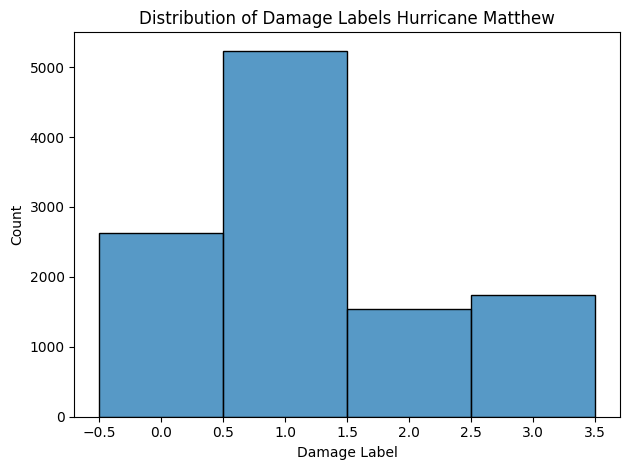

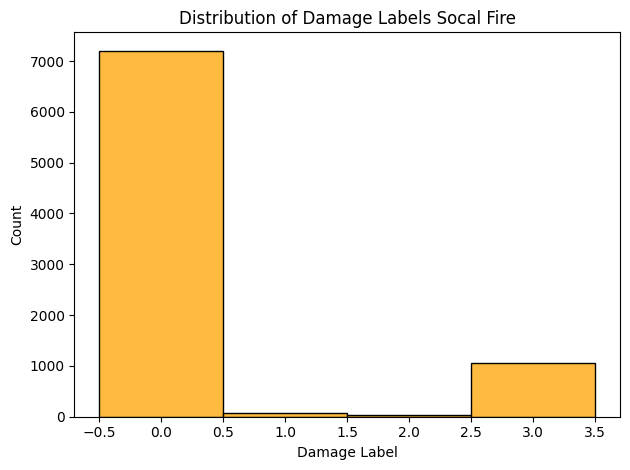

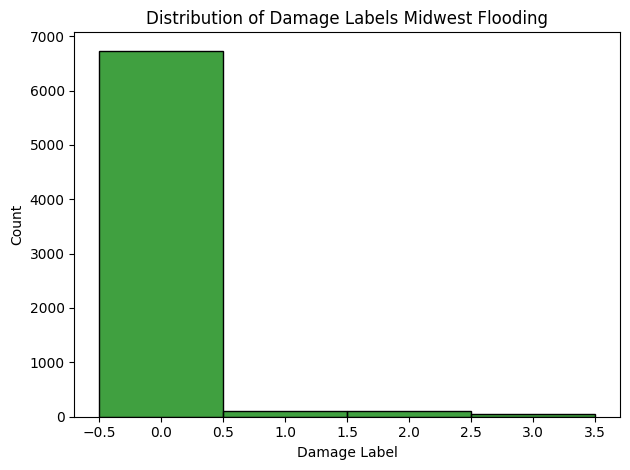

In [ ]:
#Make the bins look nicer
label_counts = label_df.groupby('labels').count()
centers = [0, 1, 2, 3]
bin_edges = np.array(centers) - 0.5
bin_edges = np.append(bin_edges, bin_edges[-1] + 1)

#Hurricane Matthew Labels
matt_label = label_df[label_df['disaster'] == 'hurricane-matthew']
sns.histplot(matt_label, bins=bin_edges, x = 'labels')
plt.title("Distribution of Damage Labels Hurricane Matthew")
plt.ylabel("Count")
plt.xlabel("Damage Label")
plt.tight_layout()
plt.show()

#Socal Fire Labels
socal_label = label_df[label_df['disaster'] == 'socal-fire']
sns.histplot(socal_label, bins=bin_edges, x = 'labels', color = 'orange')
plt.title("Distribution of Damage Labels Socal Fire")
plt.ylabel("Count")
plt.xlabel("Damage Label")
plt.tight_layout()
plt.show()

#Midwest Flooding Labels
midwest_label = label_df[label_df['disaster'] == 'midwest-flooding']
sns.histplot(midwest_label, bins=bin_edges, x = 'labels', color = 'green')
plt.title("Distribution of Damage Labels Midwest Flooding")
plt.ylabel("Count")
plt.xlabel("Damage Label")
plt.tight_layout()
plt.show()

In [ ]:
display(matt_label.describe())
display(socal_label.describe())
display(midwest_label.describe())

,labels,disaster
count,11151,11151
unique,4,1
top,1,hurricane-matthew
freq,5236,11151


,labels,disaster
count,8380,8380
unique,4,1
top,0,socal-fire
freq,7204,8380


,labels,disaster
count,7004,7004
unique,4,1
top,0,midwest-flooding
freq,6734,7004


# EDA - Useful Image Features for Classification

The agency is looking for insights into useful image features for classifying images based on disaster type or damage level. You are tasked with verifying this and exploring whether color, edge, or texture features can effectively differentiate:

1. `midwest-flooding` from `socal-fire` images.
2. Damage levels 1 and 3 within the `hurricane-matthew` dataset.

Previous interns have found color information to be potentially useful.

## Distribution of Color (RGB)

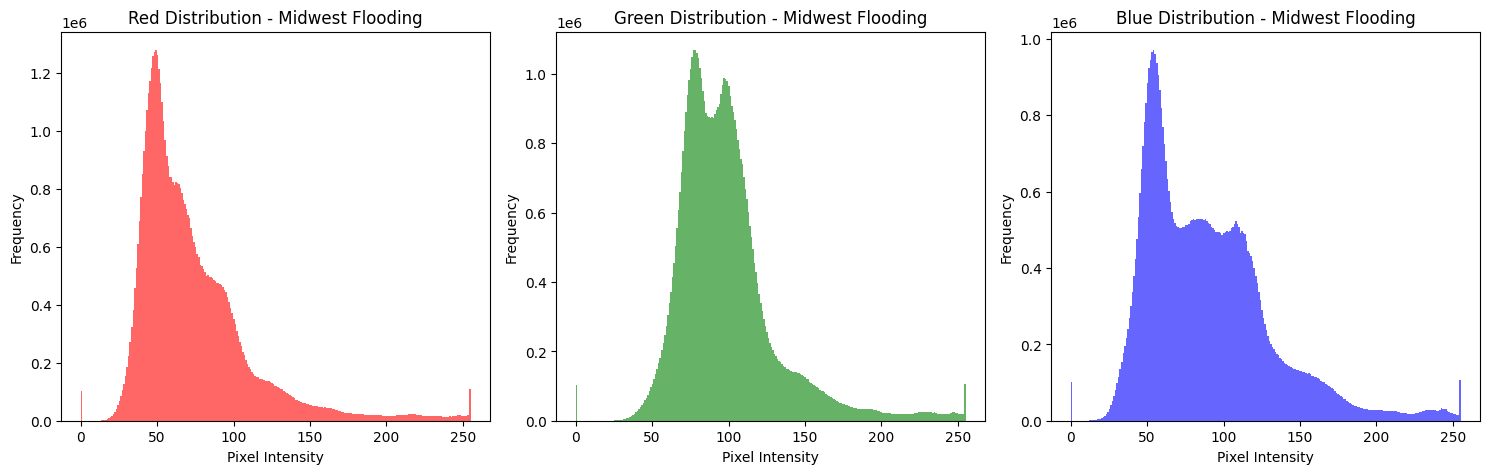

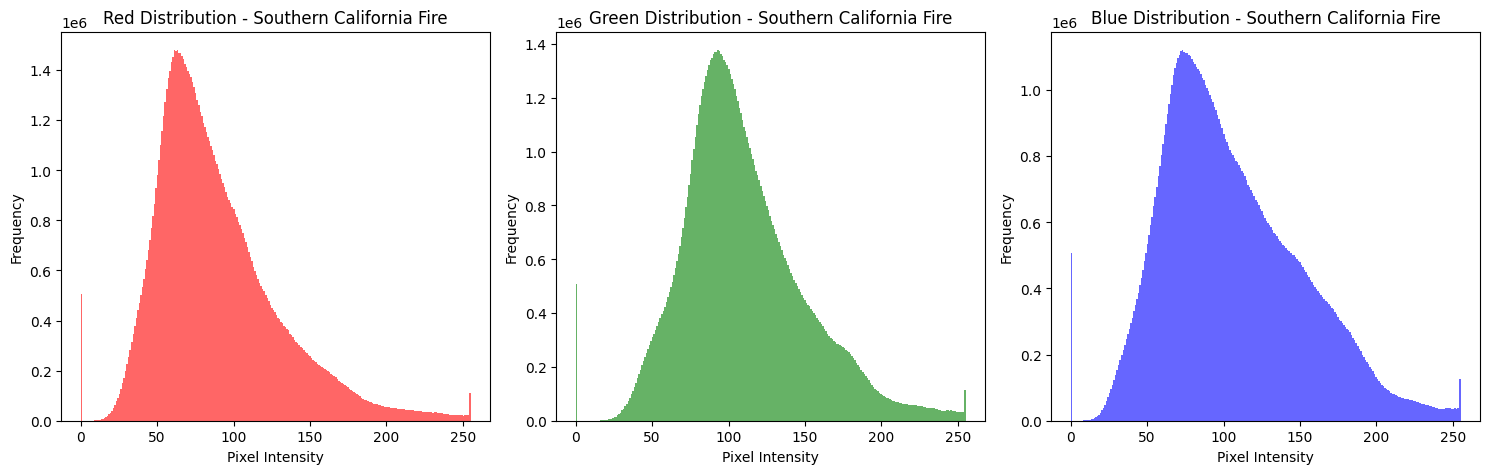

In [ ]:
def plot_rgb_distribution(images, title):
    all_images = np.vstack([image.reshape(-1, 3) for image in images])

    # Extract pixel values for channels (R, G, B)
    red_values = all_images[:, 0]
    green_values = all_images[:, 1]
    blue_values = all_images[:, 2]

    # Create the plot
    plt.figure(figsize=(15, 5))

    # Red channel
    plt.subplot(1, 3, 1)
    plt.hist(red_values, bins=256, color='red', alpha=0.6)
    plt.title(f'Red Distribution - {title}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Green channel
    plt.subplot(1, 3, 2)
    plt.hist(green_values, bins=256, color='green', alpha=0.6)
    plt.title(f'Green Distribution - {title}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Blue channel
    plt.subplot(1, 3, 3)
    plt.hist(blue_values, bins=256, color='blue', alpha=0.6)
    plt.title(f'Blue Distribution - {title}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Midwest flooding
midwest_flooding_images = data['midwest-flooding']['images']
plot_rgb_distribution(midwest_flooding_images, 'Midwest Flooding')

#Fire
socal_fire_images = data['socal-fire']['images']
plot_rgb_distribution(socal_fire_images, 'Southern California Fire')


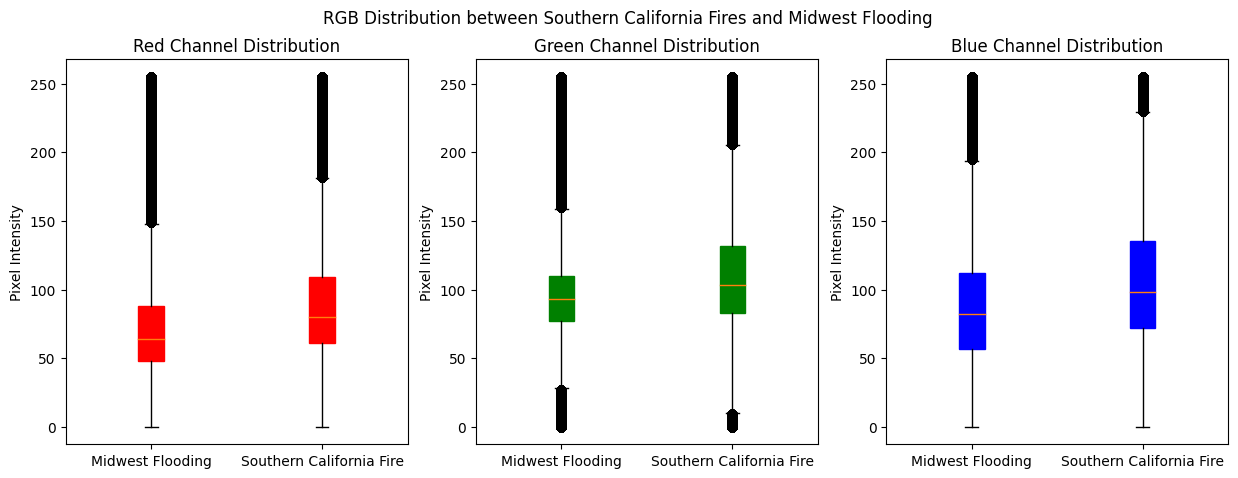

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rgb_distribution(images1, images2, title1, title2):

    all_images1 = np.vstack([image.reshape(-1, 3) for image in images1])
    all_images2 = np.vstack([image.reshape(-1, 3) for image in images2])

    # Extract pixel values for channels
    red_values1 = all_images1[:, 0]
    green_values1 = all_images1[:, 1]
    blue_values1 = all_images1[:, 2]

    red_values2 = all_images2[:, 0]
    green_values2 = all_images2[:, 1]
    blue_values2 = all_images2[:, 2]

    # Create the plot
    plt.figure(figsize=(15, 5))

    # Red channel
    plt.subplot(1, 3, 1)
    plt.boxplot([red_values1, red_values2], patch_artist=True,
                boxprops=dict(facecolor='red', color='red'))
    plt.xticks([1, 2], [title1, title2])
    plt.title('Red Channel Distribution')
    plt.ylabel('Pixel Intensity')

    # Green channel
    plt.subplot(1, 3, 2)
    plt.boxplot([green_values1, green_values2], patch_artist=True,
                boxprops=dict(facecolor='green', color='green'))
    plt.xticks([1, 2], [title1, title2])
    plt.title('Green Channel Distribution')
    plt.ylabel('Pixel Intensity')

    # Blue channel
    plt.subplot(1, 3, 3)
    plt.boxplot([blue_values1, blue_values2], patch_artist=True,
                boxprops=dict(facecolor='blue', color='blue'))
    plt.xticks([1, 2], [title1, title2])
    plt.title('Blue Channel Distribution')
    plt.ylabel('Pixel Intensity')

    plt.suptitle(f'RGB Distribution between Southern California Fires and Midwest Flooding')
    plt.show()

midwest_flooding_images = data['midwest-flooding']['images']
socal_fire = data['socal-fire']['images']
plot_rgb_distribution(midwest_flooding_images, socal_fire, 'Midwest Flooding', 'Southern California Fire')


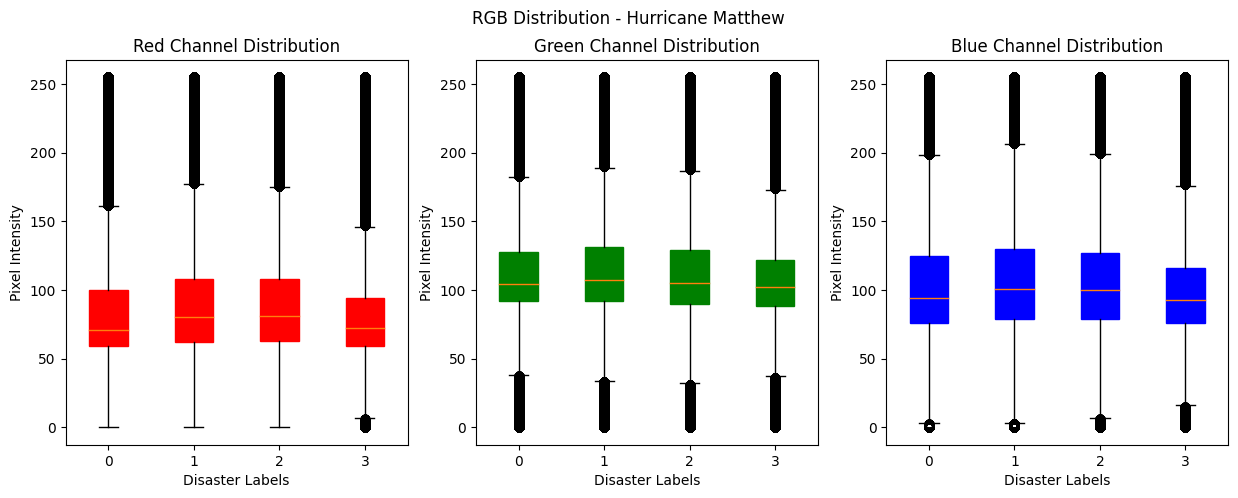

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rgb_distribution_by_label(images, labels, title):
    # Filter images by label
    labels = np.array(labels)
    images_by_label = {label: np.vstack([images[i].reshape(-1, 3) for i in range(len(images)) if labels[i] == label])
                       for label in np.unique(labels)}

    # Extract pixel values for channels
    red_values = [images_by_label[label][:, 0] for label in sorted(images_by_label.keys())]
    green_values = [images_by_label[label][:, 1] for label in sorted(images_by_label.keys())]
    blue_values = [images_by_label[label][:, 2] for label in sorted(images_by_label.keys())]

    # Create the plot
    plt.figure(figsize=(15, 5))

    # Red channel
    plt.subplot(1, 3, 1)
    plt.boxplot(red_values, patch_artist=True, boxprops=dict(facecolor='red', color='red'))
    plt.xticks(range(1, len(images_by_label) + 1), sorted(images_by_label.keys()))
    plt.title('Red Channel Distribution')
    plt.xlabel('Disaster Labels')
    plt.ylabel('Pixel Intensity')

    # Green channel
    plt.subplot(1, 3, 2)
    plt.boxplot(green_values, patch_artist=True, boxprops=dict(facecolor='green', color='green'))
    plt.xticks(range(1, len(images_by_label) + 1), sorted(images_by_label.keys()))
    plt.title('Green Channel Distribution')
    plt.xlabel('Disaster Labels')
    plt.ylabel('Pixel Intensity')

    # Blue channel
    plt.subplot(1, 3, 3)
    plt.boxplot(blue_values, patch_artist=True, boxprops=dict(facecolor='blue', color='blue'))
    plt.xticks(range(1, len(images_by_label) + 1), sorted(images_by_label.keys()))
    plt.title('Blue Channel Distribution')
    plt.xlabel('Disaster Labels')
    plt.ylabel('Pixel Intensity')

    plt.suptitle(f'RGB Distribution - {title}')
    plt.show()

hurricane_matthew_images = data['hurricane-matthew']['images']
hurricane_matthew_labels = data['hurricane-matthew']['labels']
plot_rgb_distribution_by_label(hurricane_matthew_images, hurricane_matthew_labels, 'Hurricane Matthew')


## How are the distributions "separable"?

The below are a non-exhaustive list of ways we can think about classifying these disaster images. You do not have to include all of them in your analysis.

### 1. `midwest-flooding` vs `socal-fire`

Among the different disaster events, are there are distinctions in:

- image height, width, or overall size?
- RGB values?
- Sobel edges?
- Local Binary Patterns?
- Gabor kernels?



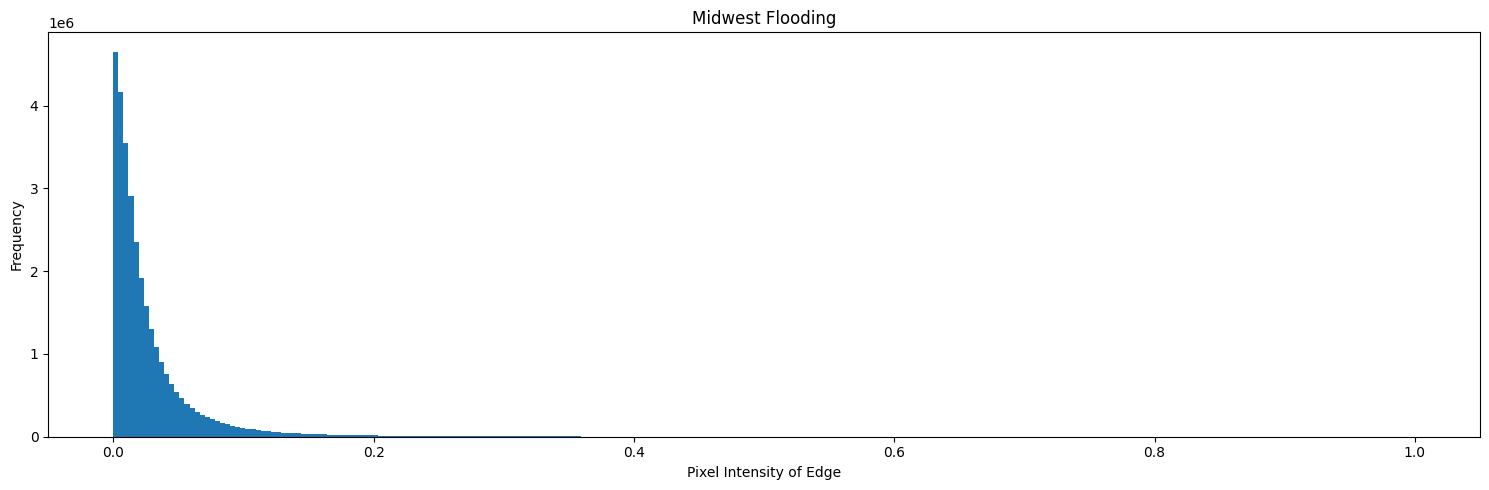

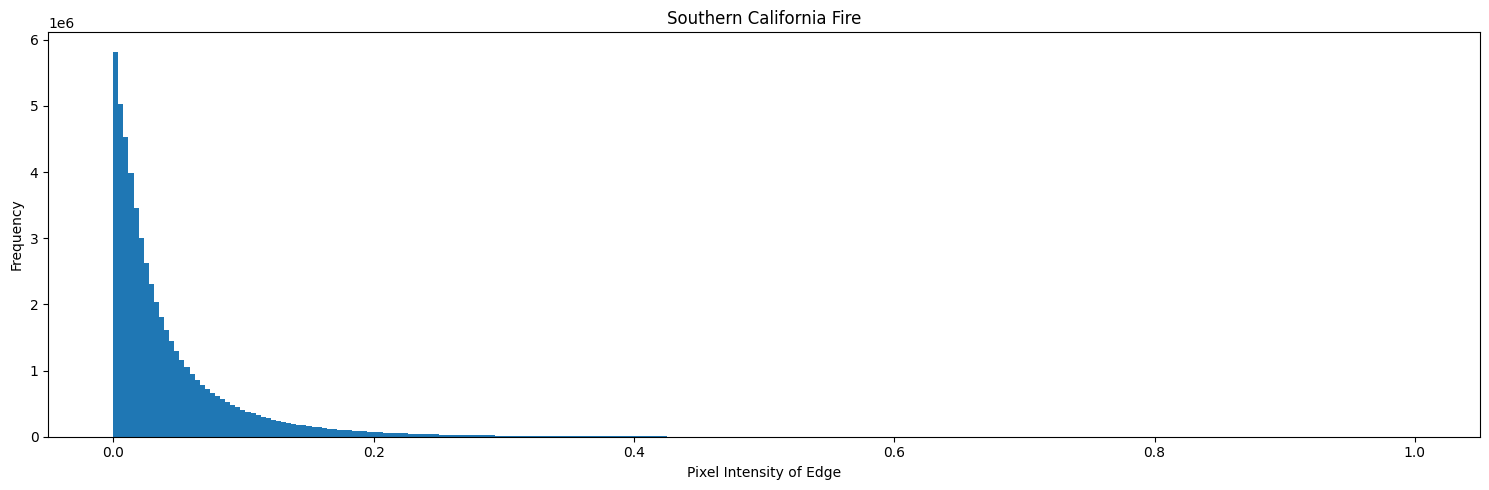

In [ ]:
def get_mean_sobel_edges(images):
  all_images = np.vstack([image.reshape(-1, 3) for image in images])
  all_images = get_sobel_features(all_images)
  return np.mean(all_images)

def get_sobel_edges(images):
  all_images = np.vstack([image.reshape(-1, 3) for image in images])
  all_images = get_sobel_features(all_images)
  return all_images

def plot_sobel_edges_distribution(images, title):
    all_images = np.vstack([image.reshape(-1, 3) for image in images])
    all_images = get_sobel_features(all_images)

    # Create the plot
    plt.figure(figsize=(15, 5))

    plt.hist(all_images, bins = 256, range = (0,1))
    plt.title(title)
    plt.xlabel('Pixel Intensity of Edge')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Midwest flooding
plot_sobel_edges_distribution(midwest_flooding_images, 'Midwest Flooding')

#Fire
plot_sobel_edges_distribution(socal_fire_images, 'Southern California Fire')


### 2. Damage levels 1 vs 3 within the `hurricane-matthew` dataset

Is there a relationship between the damage level and:

- image height, width, or overall size?
- RGB values?
- Sobel edges?
- Local Binary Patterns?
- Gabor kernels?

In [ ]:
matt['images'] = data['hurricane-matthew']['images']
matt_1 = matt[matt['labels'] == 1]['images']
matt_3 = matt[matt['labels'] == 3]['images']

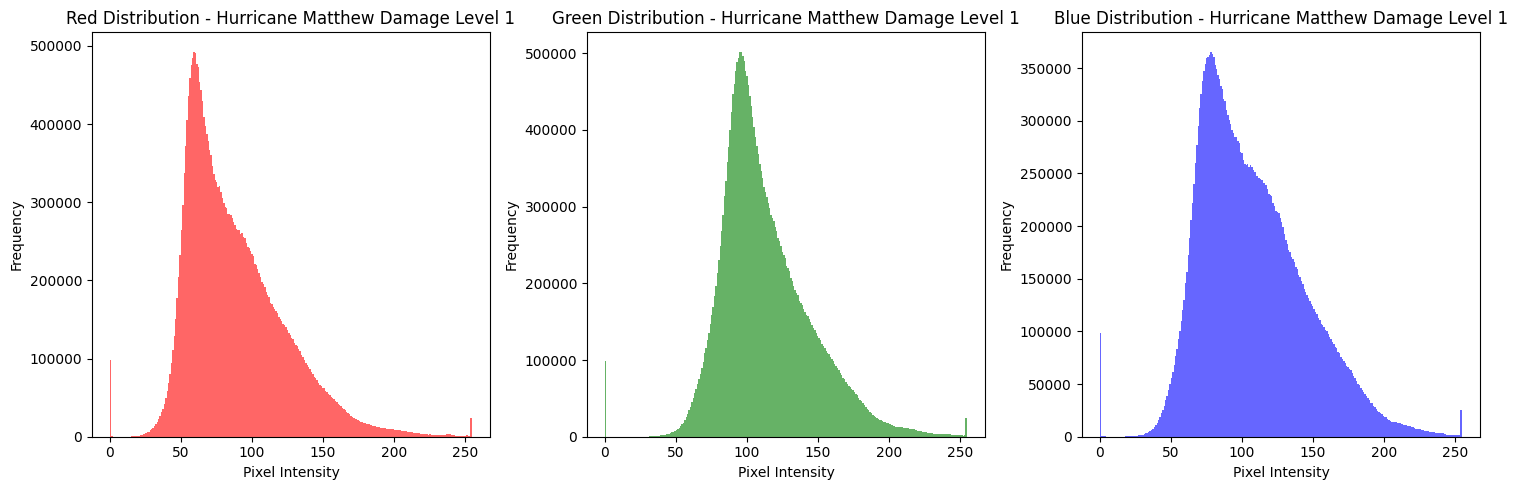

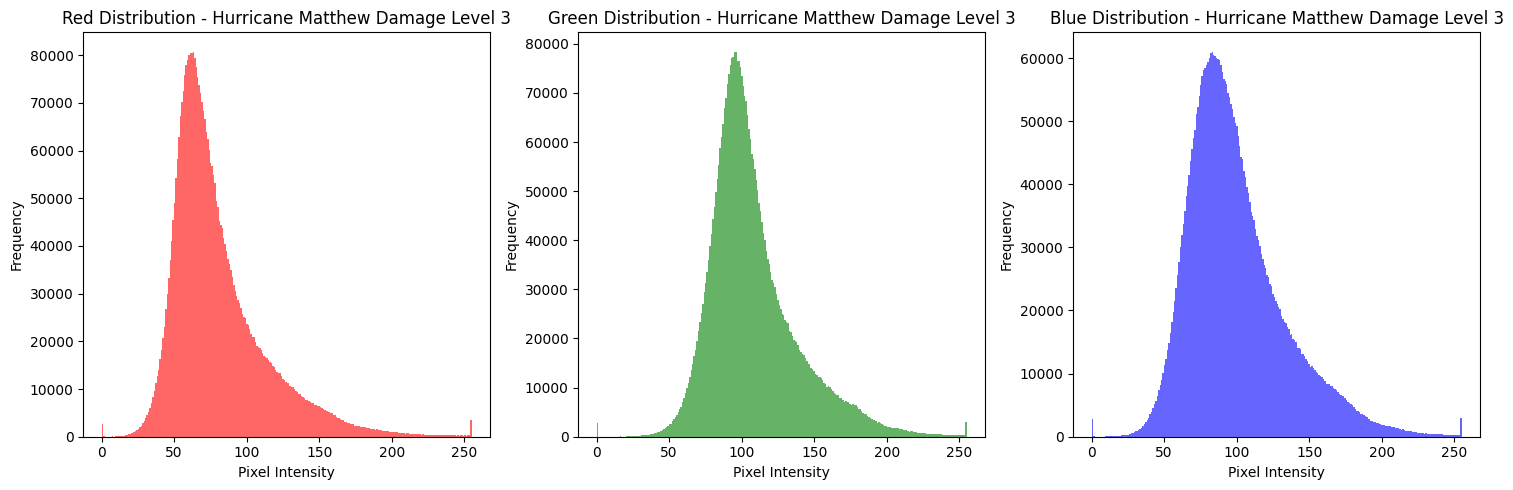

In [ ]:
def plot_rgb_distribution(images, title):
    all_images = np.vstack([image.reshape(-1, 3) for image in images])

    # Extract pixel values for channels (R, G, B)
    red_values = all_images[:, 0]
    green_values = all_images[:, 1]
    blue_values = all_images[:, 2]

    # Create the plot
    plt.figure(figsize=(15, 5))

    # Red channel
    plt.subplot(1, 3, 1)
    plt.hist(red_values, bins=256, color='red', alpha=0.6)
    plt.title(f'Red Distribution - {title}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Green channel
    plt.subplot(1, 3, 2)
    plt.hist(green_values, bins=256, color='green', alpha=0.6)
    plt.title(f'Green Distribution - {title}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Blue channel
    plt.subplot(1, 3, 3)
    plt.hist(blue_values, bins=256, color='blue', alpha=0.6)
    plt.title(f'Blue Distribution - {title}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Damage Level 1
plot_rgb_distribution(matt_1, 'Hurricane Matthew Damage Level 1')

#Damage Level 3
plot_rgb_distribution(matt_3, 'Hurricane Matthew Damage Level 3')


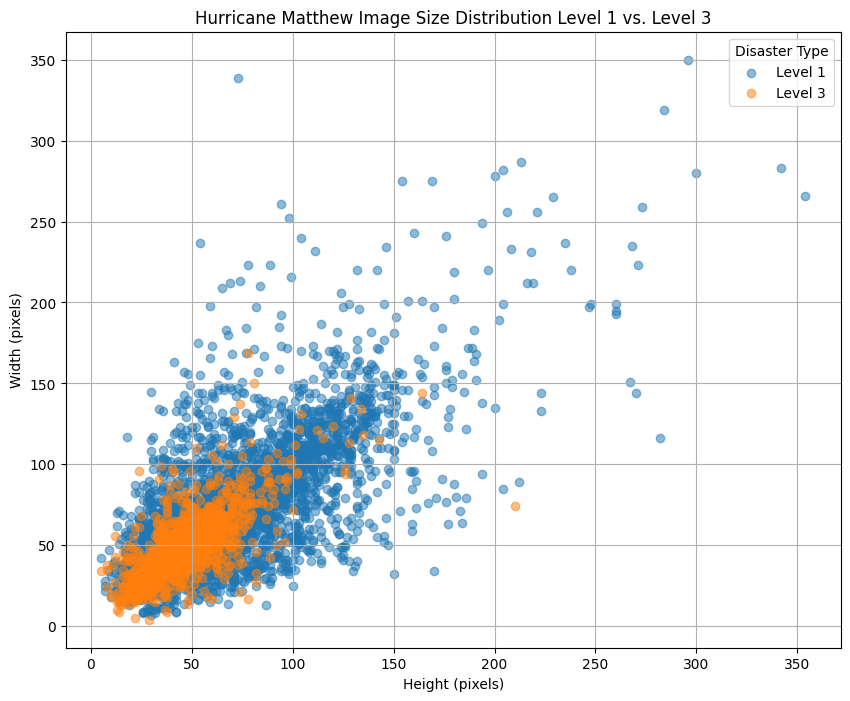

In [ ]:
import matplotlib.pyplot as plt

# Initialize a dictionary to store the sizes for each disaster
image_size_distribution = {}

# Iterate over each disaster to compute the image sizes
for label_series in [(matt_1, "Level 1"), (matt_3, "Level 3")]:
    # Retrieve images for the current disaster
    images = label_series[0]

    # Calculate the sizes of each image (height, width)
    sizes = [image.shape[:2] for image in images]  # shape[:2] gets (height, width)

    # Store the sizes in the dictionary
    image_size_distribution[label_series[1]] = sizes

# Plot the distribution of image sizes for each disaster
plt.figure(figsize=(10, 8))

for disaster, sizes in image_size_distribution.items():
    # Extract heights and widths separately for each disaster
    heights = [size[0] for size in sizes]
    widths = [size[1] for size in sizes]

    # Create a scatter plot for the sizes
    plt.scatter(heights, widths, label=disaster, alpha=0.5)

# Add plot details
plt.title('Hurricane Matthew Image Size Distribution Level 1 vs. Level 3')
plt.xlabel('Height (pixels)')
plt.ylabel('Width (pixels)')
plt.legend(title='Disaster Type')
plt.grid(True)
plt.show()


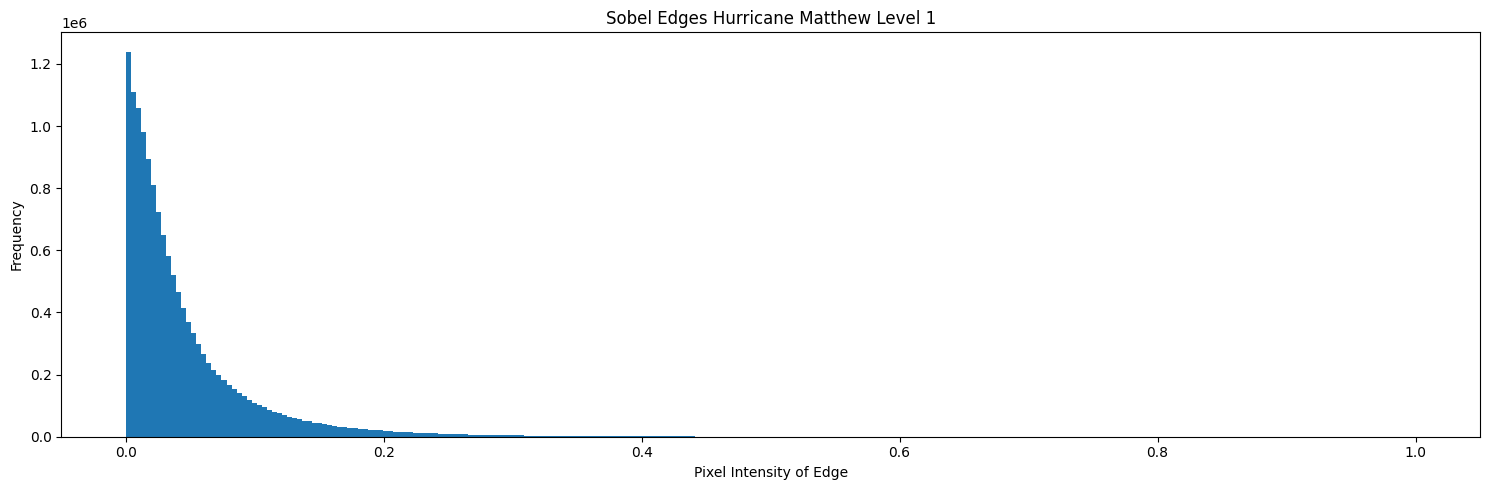

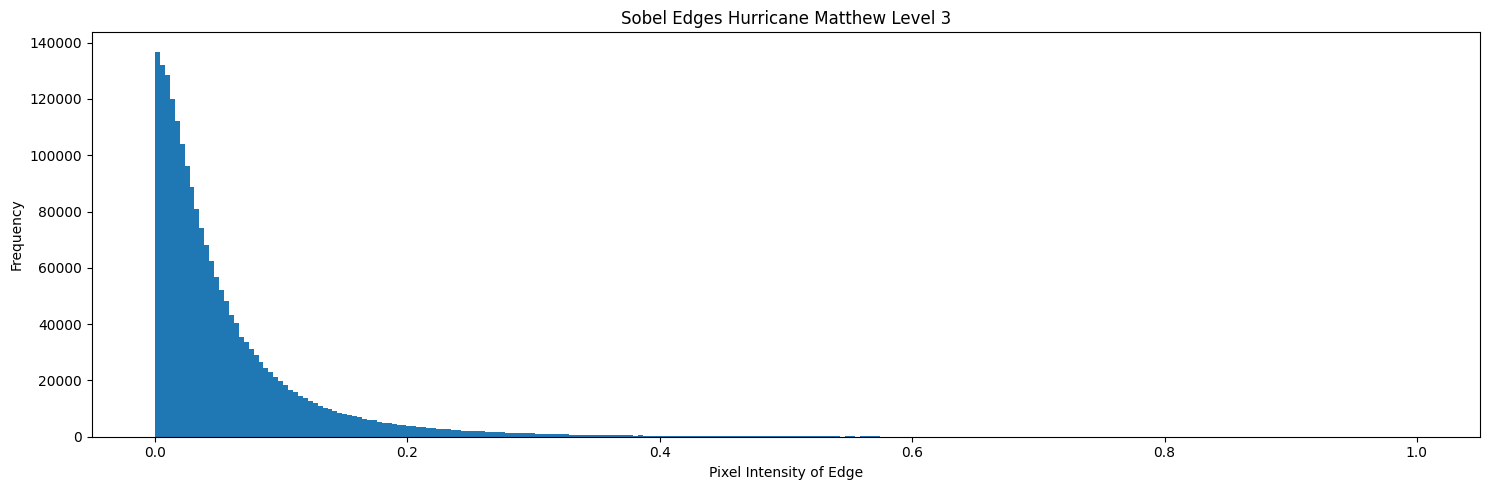

In [ ]:
plot_sobel_edges_distribution(matt_1, "Sobel Edges Hurricane Matthew Level 1")
plot_sobel_edges_distribution(matt_3, "Sobel Edges Hurricane Matthew Level 3")